In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Input path

In [8]:
path2file = "/home/user/YixiTFG/TFG_Yixi/RepoRT_trials/1.RepoRT_GNNs0/Results/"

In [4]:
def get_index_array (num_repos):
    """
    Input: The number of repos you want to use for training
    Output: a numpy array containing the indexes string in the specific format ("0001", e.g.)
    """
    index_array = []
    for index in range(1, num_repos+1):
        index = str (index)
        while len (index) < 4:
            index = "0" + index
        index_array.append (str (index))
    return np.array(index_array)

In [40]:
index_array = get_index_array(440)
MAE_array = []
RMSE_array = []
dir = []
dir_count = 0
true_index = []
for index in index_array:
    try:
        filename = path2file + "Results_" + index + "/"+ "Metrics_"+ index + ".txt"
        f = open (filename).readlines ()
        MAE_array.append (np.float16 (f[0].split (' ') [1]))
        RMSE_array.append (np.float16 (f[1].split (' ') [1]))
        dir_count += 1
        dir.append(dir_count)
        true_index.append (index)
    except:
        print (f"The dir {index} does not exist")
        continue
MAE_array = np.array(MAE_array)
RMSE_array = np.array(RMSE_array)
dir = np.array(dir)
true_index = np.array (true_index)

The dir 0022 does not exist
The dir 0035 does not exist
The dir 0046 does not exist
The dir 0205 does not exist
The dir 0206 does not exist
The dir 0207 does not exist
The dir 0214 does not exist
The dir 0222 does not exist
The dir 0230 does not exist
The dir 0255 does not exist
The dir 0296 does not exist
The dir 0297 does not exist
The dir 0298 does not exist
The dir 0299 does not exist
The dir 0300 does not exist
The dir 0301 does not exist
The dir 0302 does not exist
The dir 0303 does not exist
The dir 0304 does not exist
The dir 0305 does not exist
The dir 0306 does not exist
The dir 0307 does not exist
The dir 0308 does not exist
The dir 0309 does not exist
The dir 0325 does not exist
The dir 0341 does not exist
The dir 0357 does not exist
The dir 0358 does not exist
The dir 0361 does not exist
The dir 0362 does not exist
The dir 0408 does not exist
The dir 0439 does not exist
The dir 0440 does not exist


In [36]:
# Export result to tsv file
filename = path2file + "summary_results.tsv"
summary = pd.DataFrame({
    "Num_repo": true_index,
    "MAE": MAE_array,
    "RMSE": RMSE_array,
})
summary.to_csv (filename , index = False, sep = "\t")

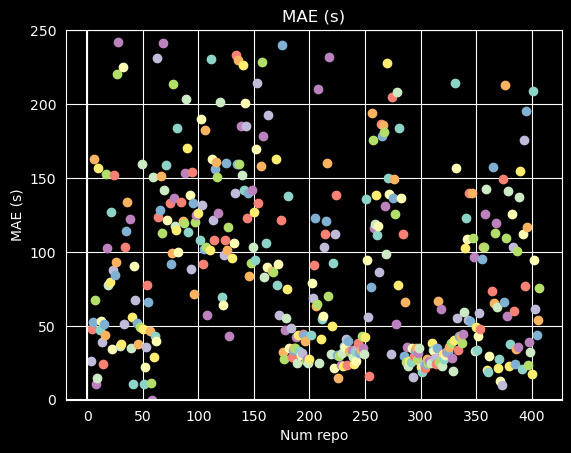

In [42]:
for dir_num, mae in zip (dir, MAE_array):
    plt.scatter (dir_num, mae)
plt.title ("MAE (s)")
plt.xlabel ("Num repo")
plt.ylabel ("MAE (s)")
plt.grid (True)
plt.ylim ([0,250])
plt.axhline ()
plt.axvline ()
plt.show ()

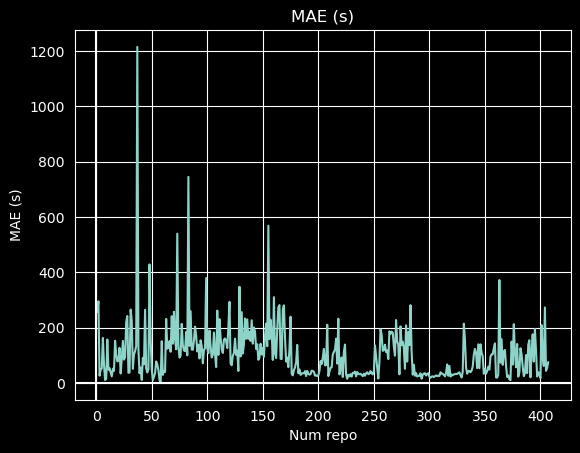

In [43]:
plt.plot (dir, MAE_array)
plt.title ("MAE (s)")
plt.xlabel ("Num repo")
plt.ylabel ("MAE (s)")
plt.grid (True)
plt.axhline ()
plt.axvline ()
plt.show ()

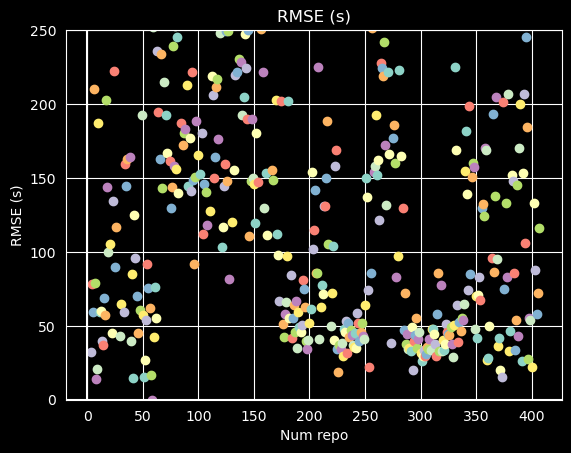

In [45]:
for dir_num, mae in zip (dir, RMSE_array):
    plt.scatter (dir_num, mae)
plt.title ("RMSE (s)")
plt.xlabel ("Num repo")
plt.ylabel ("RMSE (s)")
plt.grid (True)
plt.ylim ([0,250])
plt.axhline ()
plt.axvline ()
plt.show ()

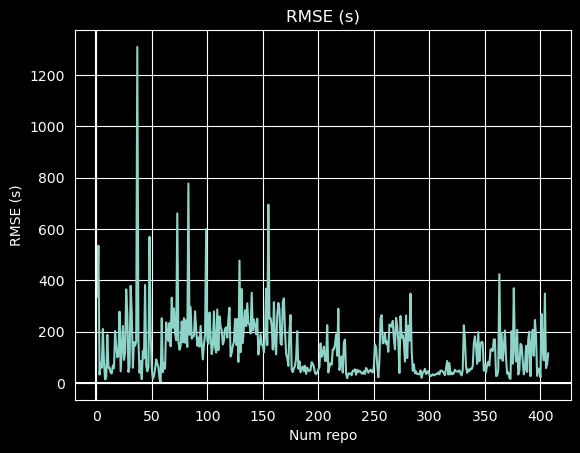

In [48]:
plt.plot (dir, RMSE_array)
plt.title ("RMSE (s)")
plt.xlabel ("Num repo")
plt.ylabel ("RMSE (s)")
plt.grid (True)
plt.axhline ()
plt.axvline ()
plt.show ()